In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
%matplotlib inline
plt.rcParams['figure.figsize']=(10.0,8.0)

## 1. Build and evaluate the model by using additional one feature which has high feature next to RM and LSTV

### Get Data

In [4]:
# data from kaggle.com at https://www.kaggle.com/altavish/boston-housing-dataset
# loading the data
data = pd.read_csv("HousingData.csv")

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
print('The train data has {0} rows and {1} columns'.format(data.shape[0],data.shape[1]))

The train data has 506 rows and 14 columns


In [7]:
# returns columns with null value
data.columns[data.isnull().any()]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT'], dtype='object')

In [8]:
#missing value counts in each of these columns
miss = data.isnull().sum()/len(data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

CRIM     0.039526
ZN       0.039526
INDUS    0.039526
CHAS     0.039526
AGE      0.039526
LSTAT    0.039526
dtype: float64

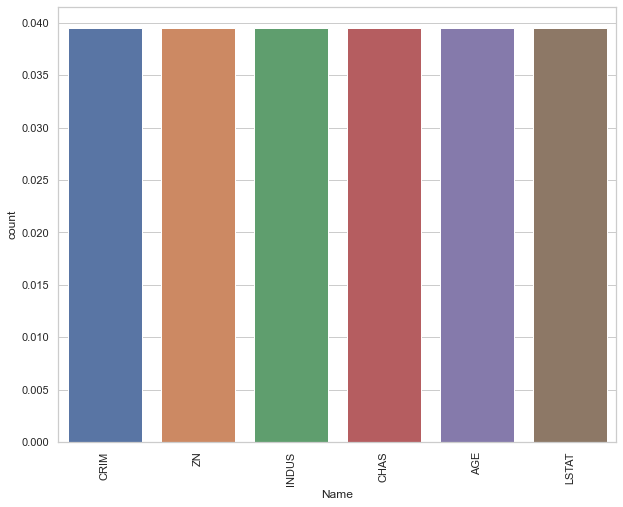

In [9]:
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
sns.set(style="whitegrid",color_codes=True)
sns.barplot(x='Name',y='count',data=miss)
plt.xticks(rotation=90)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

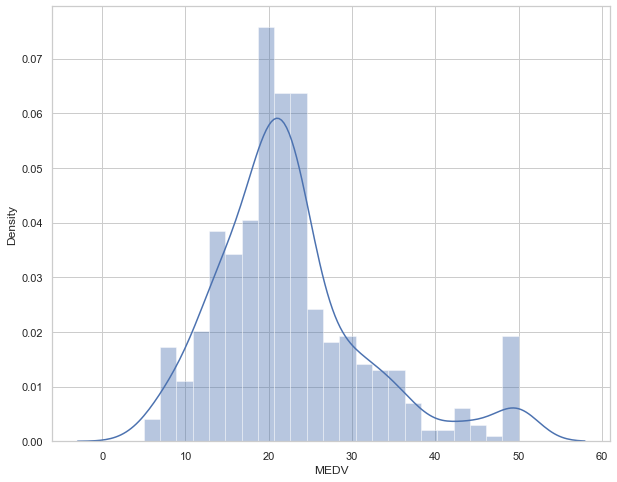

In [10]:
#Target vaiable
sns.distplot(data['MEDV'])

<AxesSubplot:>

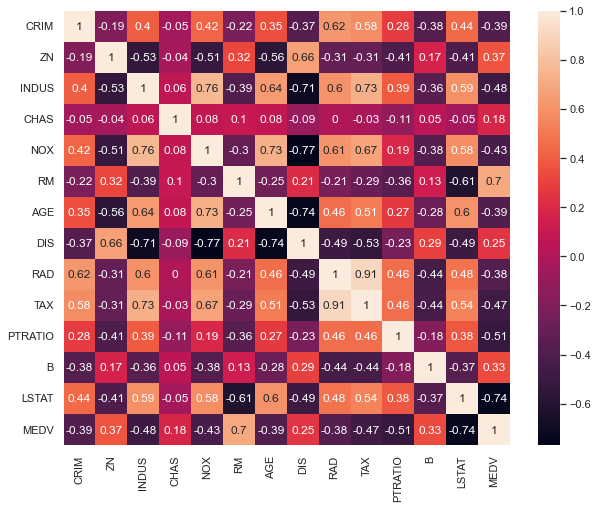

In [11]:
correlation_matrix = data.corr().round(2)
#annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix,annot=True)

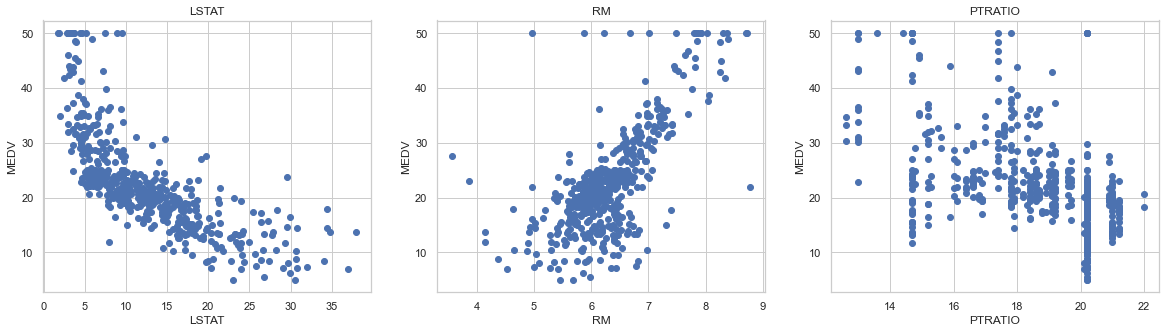

In [12]:
plt.figure(figsize=(20,5))

features = ['LSTAT','RM','PTRATIO']
target = data['MEDV']

for i,col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x = data[col]
    y = target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [13]:
data.dropna(inplace=True)

In [14]:
x = pd.DataFrame(np.c_[data['LSTAT'],data['RM'],data['PTRATIO']],columns = ['LSTAT','RM','PTRATIO'])
x = x.fillna(x.mean()).values
y = data['MEDV'].values

C:\Users\hp\AppData\Local\Temp/ipykernel_11836/3140127971.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(flg)
C:\Users\hp\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:902: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\hp\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


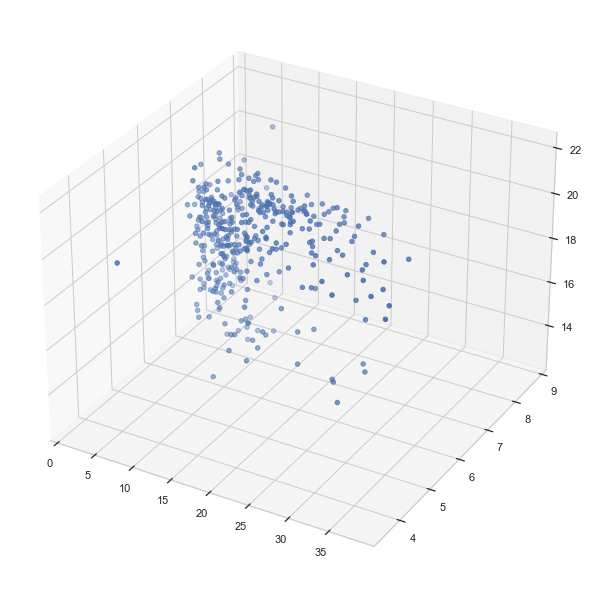

In [15]:
flg = plt.figure()
ax = Axes3D(flg)
ax.scatter(x[:,0],x[:,1],x[:,2],y)
plt.show()

In [16]:
# feature normalization
def featureNormalize(x):
    mu = np.mean(x,axis=0)
    sigma = np.std(x,ddof = 1,axis = 0)
    x_norm = (x - mu)/sigma
    return x_norm,mu,sigma

In [17]:
x_train,mu,sigma = featureNormalize(x)
x_train = np.hstack((np.ones((x_train.shape[0],1)),x_train))

In [18]:
def computeCostMulti(x,y,theta):
    h = np.dot(x,theta) - y
    h
    j = np.dot(h,h)/(2*x.shape[0])
    return j

In [19]:
def gradientDescentMulti(x,y,theta,alpha,num_iters):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = (theta - (alpha / x.shape[0])*np.dot(x.T,(np.dot(x,theta) - y)))
        J_history[i] = computeCostMulti(x,y,theta)
    return theta,J_history

In [20]:
theta = np.zeros(4)
alpha = 0.01
num_iters = 400
theta,J_history = gradientDescentMulti(x_train,y,theta,alpha,num_iters)
print(theta)

[21.95827668 -3.74293852  3.38659753 -2.19478653]


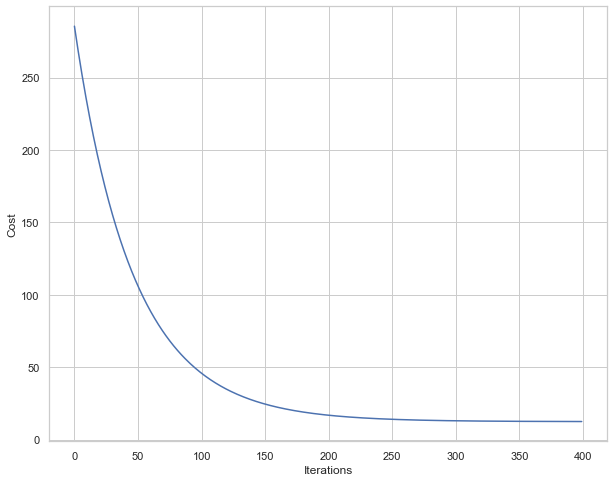

In [21]:
plt.figure()
plt.plot(np.arange(num_iters),J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

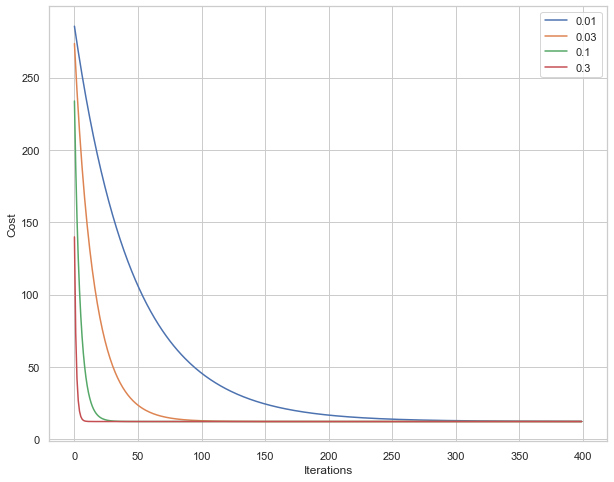

In [22]:
# different learning rates 
alphas = [0.01,0.03,0.1,0.3]
plt.figure()
for alpha in alphas:
    theta = np.zeros(4)
    num_iters = 400
    theta,J_history = gradientDescentMulti(x_train,y,theta,alpha,num_iters)
    plt.plot(np.arange(num_iters),J_history,label = str(alpha))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [23]:
X = pd.DataFrame(np.c_[data['LSTAT'],data['RM'],data['PTRATIO']],columns = ['LSTAT','RM','PTRATIO'])
Y = data['MEDV']

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5,random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(197, 3)
(197, 3)
(197,)
(197,)


In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train.fillna(X_train.mean()),Y_train)

LinearRegression()

In [26]:
#model evaluation for training set
y_train_predict = lr_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,y_train_predict)))
r2 = r2_score(Y_train,y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print("Slope:",lr_model.coef_)
print("Intercept:",lr_model.intercept_)
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

#model evaluation for testing set
y_test_predict = lr_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))
r2 = r2_score(Y_test,y_test_predict)

print("The model performance for testing set")
print("-------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))

The model performance for training set
--------------------------------------
Slope: [-0.45297135  5.13703877 -0.97199868]
Intercept: 13.945494358023783
RMSE is 5.047562048599232
R2 score is 0.6957024486915813


The model performance for testing set
-------------------------------------
RMSE is 4.928150481330882
R2 score is 0.7063635378790865


## 2. Fit a polynomial regression model to the training data

In [27]:
pr_model = make_pipeline(PolynomialFeatures(2),LinearRegression())
pr_model.fit(X_train.fillna(X_train.mean()),Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

## 3. Predict the labels for the corresponding test data

In [28]:
y_test_predict = pr_model.predict(X_test)

## 4. Evaluate and generate the model parameters 

In [29]:
#model evaluation for training set
y_train_predict = pr_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,y_train_predict)))
r2 = r2_score(Y_train,y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print("Slope:",lr_model.coef_)
print("Intercept:",lr_model.intercept_)
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

#model evaluation for testing set
y_test_predict = pr_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))
r2 = r2_score(Y_test,y_test_predict)

print("The model performance for testing set")
print("-------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))

The model performance for training set
--------------------------------------
Slope: [-0.45297135  5.13703877 -0.97199868]
Intercept: 13.945494358023783
RMSE is 3.951019637878438
R2 score is 0.8135538149713706


The model performance for testing set
-------------------------------------
RMSE is 4.096315425868226
R2 score is 0.7971248548301506


## 5. Out of these predictors used in this assignment, which would you choose as a final model for the boston housing

As we can see form the model evaluations the polynomial model has a higher r_square score and a bit - lower RMSE which indicates the polynomial model is better